In [1]:
#importing library
import pandas as pd
import numpy as np
import plotly.express as ps
import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
#loading the data
df=pd.read_csv('../input/highly-rated-children-books-and-stories/children_stories.Csv',encoding='latin-1')
df

,names,cats,desc
0,HIDE AND SEEK,Age 2-9,Was it just another game of hide and seek? No....
1,GINGER THE GIRAFFE,Age 2-9,Read this warm tale of camaraderie and affecti...
2,DOING MY CHORES,Age 2-9,Love shines through this great illustrated kid...
3,ABE THE SERVICE DOG,Age 2-9,Abe was a real Service Dog who dedicated his l...
4,SUNNY MEADOWS WOODLAND SCHOOL,Age 2-9,The class took a little train and went deep in...
...,...,...,...
425,Carrying the Elephant: A Memoir of Love and Loss,Age 11+,In the 72 prose poems that make up this unusua...
426,War and Peas,Age 8+,Nearly forty years after its original appearan...
427,Love that Dog,Age 9-12,"Jack has a great sadness in his life, but he i..."
428,A Pilgrim's Progress,Age 9+,'I had a dream last night ... large enough to ...


# Creating labels


In [3]:
#creating new column with younger and older category
df['cats'].value_counts()

Age 9+          32
Age 3+          32
Age 7+          27
Age 8+          26
Age 10+         26
Age 6+          21
Age 4+          20
Age 2-9         20
Age 11+         19
Age 5+          17
Age 0-4         16
Age 0+          13
Age 2+          12
Age 12+         12
Age 0-3         11
Age 2-6         10
Age 3-6          9
Age 2-5          9
Age 0-5          8
Age 3-5          7
Age 1-3          6
Age 1-5          5
Age 3-7          5
Age 1-4          4
Age 8-12         4
Age 7-11         4
Age 5-8          3
Age 13+          3
Age 4-8          3
Age 4-6          3
Age 6-11         3
Age 9-11         3
Age 0-2          2
Age 7-9          2
Age 5-9          2
Age 7-10         2
Age 1+           2
Age 6-8          2
Age              2
Age 4-7          2
Age 9-13         2
Age 9-12         2
Age 8-11         1
Age 10-14        1
Age 11-14        1
Age 2-4          1
Age 9-14         1
Age 6-9          1
Age 7-12         1
Age 6months+     1
Age 4-5          1
Age 1-2          1
Age 4-11    

It looks like 5 and up is a good way to classify older  books.
Let's just sort the unique values as a list so we can see 
any leading or trailing whitespace in the entries

In [4]:
#checking the unique values 
list(df['cats'].unique())

['Age 2-9',
 'Age 1-2',
 'Age 1-3',
 'Age 0-2',
 'Age  0-3',
 'Age 0-3',
 'Age 3-5',
 'Age 0+',
 'Age 1-5',
 'Age 1-4',
 'Age 2-6',
 'Age 2-7',
 'Age 3-6',
 'Age 0-4',
 'Age 2-5',
 'Age 4-6',
 'Age 0-5',
 'Age 2+',
 'Age 4+',
 'Age 3+',
 'Age 3-7',
 'Age 3-4',
 'Age 1-6',
 'Age 0-6',
 'Age 4-7',
 'Age 5-8',
 'Age 1+',
 'Age 5+',
 'Age 4-11',
 'Age 2-4',
 'Age 4-5',
 'Age 4-8',
 'Age 6months+',
 'Age 6-8',
 'Age 6-11',
 'Age 8-12',
 'Age 7-10',
 'Age 7-12',
 'Age 7+',
 'Age 5-9',
 'Age 6+',
 'Age 7-9',
 'Age 8+',
 'Age 7-11',
 'Age 6-9',
 'Age 9-14',
 'Age 9-11',
 'Age 9+',
 'Age 10+',
 'Age 11+',
 'Age 13+',
 'Age 12+',
 'Age ',
 'Age 9-13',
 'Age 11-14',
 'Age 10-14',
 'Age 9-12',
 'Age 8-11',
 'Age 11-15']

In [5]:
df.drop(df.query("cats=='Age '").index,axis=0).reset_index(drop=True)

,names,cats,desc
0,HIDE AND SEEK,Age 2-9,Was it just another game of hide and seek? No....
1,GINGER THE GIRAFFE,Age 2-9,Read this warm tale of camaraderie and affecti...
2,DOING MY CHORES,Age 2-9,Love shines through this great illustrated kid...
3,ABE THE SERVICE DOG,Age 2-9,Abe was a real Service Dog who dedicated his l...
4,SUNNY MEADOWS WOODLAND SCHOOL,Age 2-9,The class took a little train and went deep in...
...,...,...,...
423,Carrying the Elephant: A Memoir of Love and Loss,Age 11+,In the 72 prose poems that make up this unusua...
424,War and Peas,Age 8+,Nearly forty years after its original appearan...
425,Love that Dog,Age 9-12,"Jack has a great sadness in his life, but he i..."
426,A Pilgrim's Progress,Age 9+,'I had a dream last night ... large enough to ...


We wil ceate a lit of the values that count as younger

In [6]:
young_ages=[
    'Age 6months+',
    'Age 0-3',
    'Age 0+',
    'Age 0-2',
    'Age 0-3',
    'Age 0-4',
    'Age 0-5',
    'Age 0-6',
    'Age 1+',
    'Age 1-2',
    'Age 1-3',
    'Age 1-4',
    'Age 1-5',
    'Age 1-6',
    'Age 2+',
    'Age 2-4',
    'Age 2-5',
    'Age 2-6',
    'Age 2-7',
    'Age 2-9',
    'Age 3+',
    'Age 3-4',
    'Age 3-5',
    'Age 3-6',
    'Age 3-7',
    'Age 4+',
    'Age 4-11',
    'Age 4-5',
    'Age 4-6',
    'Age 4-7',
    'Age 4-8'
]

In [7]:
df['cats']=df['cats'].apply(lambda age:0 if age in young_ages else 1)

In [8]:
df['cats'].value_counts()/len(df['cats'])

1    0.516279
0    0.483721
Name: cats, dtype: float64

In [34]:
df

,names,cats,desc
0,HIDE AND SEEK,0,Was it just another game of hide and seek? No....
1,GINGER THE GIRAFFE,0,Read this warm tale of camaraderie and affecti...
2,DOING MY CHORES,0,Love shines through this great illustrated kid...
3,ABE THE SERVICE DOG,0,Abe was a real Service Dog who dedicated his l...
4,SUNNY MEADOWS WOODLAND SCHOOL,0,The class took a little train and went deep in...
...,...,...,...
425,Carrying the Elephant: A Memoir of Love and Loss,1,In the 72 prose poems that make up this unusua...
426,War and Peas,1,Nearly forty years after its original appearan...
427,Love that Dog,1,"Jack has a great sadness in his life, but he i..."
428,A Pilgrim's Progress,1,'I had a dream last night ... large enough to ...


#Processing the text

We  can start by defining a function to remove any digits
and stop words from the texts

In [35]:
def process_text(text):
    #removing digits
    text=re.sub(r'\d+',' ',text)
    #Split on whitespace
    text=text.split()
    #Join on whitespace, buy onl the words taht are not stop words
    text=' '.join([word for word in text if word not in stopwords.words('english')])
    return text
    

In [36]:
names=df['names'].apply(process_text)

In [37]:
names

0                              HIDE AND SEEK
1                         GINGER THE GIRAFFE
2                            DOING MY CHORES
3                        ABE THE SERVICE DOG
4              SUNNY MEADOWS WOODLAND SCHOOL
                       ...                  
425    Carrying Elephant: A Memoir Love Loss
426                                 War Peas
427                                 Love Dog
428                     A Pilgrim's Progress
429                           Secret Friends
Name: names, Length: 430, dtype: object

In [40]:
descriptions=df['desc'].copy().apply(process_text)

In [41]:
descriptions

0      Was another game hide seek? No. It not. First ...
1      Read warm tale camaraderie affection set wild ...
2      Love shines great illustrated kidsâ book . R...
3      Abe real Service Dog dedicated life assisting ...
4      The class took little train went deep woods fi...
                             ...                        
425    In prose poems make unusual moving collection,...
426    Nearly forty years original appearance, shamef...
427    Jack great sadness life, share feelings anyone...
428    'I dream last night ... large enough fill rest...
429    At new school, Rafaella suffers daily name-cal...
Name: desc, Length: 430, dtype: object

In [24]:
labels=df['cats']

In [25]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
425    1
426    1
427    1
428    1
429    1
Name: cats, Length: 430, dtype: int64

Now let us tokenize the texts to give us a word-to-integer
mapping for all the words in all the texts.


In [42]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(pd.concat([names,descriptions]))
names=tokenizer.texts_to_sequences(names)

descriptions=tokenizer.texts_to_sequences(descriptions)

In [45]:
names[0:5]

[[833, 68, 606],
 [716, 1, 2287],
 [2288, 325, 2289],
 [2290, 1, 1023, 114],
 [717, 3552, 2291, 45]]

In [46]:
tokenizer.word_index

{'the': 1,
 'book': 2,
 'story': 3,
 'this': 4,
 'children': 5,
 'a': 6,
 'little': 7,
 'illustrations': 8,
 'one': 9,
 'new': 10,
 'life': 11,
 'classic': 12,
 'first': 13,
 'young': 14,
 'but': 15,
 'in': 16,
 'when': 17,
 'world': 18,
 'family': 19,
 'tale': 20,
 'old': 21,
 'readers': 22,
 'make': 23,
 'much': 24,
 'time': 25,
 'find': 26,
 'series': 27,
 'day': 28,
 'stories': 29,
 'friends': 30,
 'love': 31,
 'great': 32,
 'well': 33,
 'baby': 34,
 'also': 35,
 'christmas': 36,
 'home': 37,
 'father': 38,
 'it': 39,
 'like': 40,
 'text': 41,
 'picture': 42,
 'fun': 43,
 'full': 44,
 'school': 45,
 'â\x80\x93': 46,
 'read': 47,
 'way': 48,
 'help': 49,
 'beautiful': 50,
 'together': 51,
 'soon': 52,
 'books': 53,
 'even': 54,
 'he': 55,
 'adventure': 56,
 'finds': 57,
 'perfect': 58,
 'back': 59,
 'mother': 60,
 'two': 61,
 'bear': 62,
 'cat': 63,
 'with': 64,
 'get': 65,
 'characters': 66,
 'as': 67,
 'and': 68,
 'friend': 69,
 'illustrated': 70,
 'see': 71,
 'ever': 72,
 'boy': 

In [43]:
descriptions

[[1328,
  89,
  399,
  833,
  606,
  359,
  39,
  468,
  13,
  3648,
  485,
  117,
  486,
  750,
  266,
  541,
  3649,
  303,
  134,
  359,
  39,
  468,
  47,
  1060,
  56,
  641,
  30,
  167,
  70,
  2403,
  2,
  1,
  43,
  183,
  487,
  3650,
  115],
 [47,
  186,
  20,
  3651,
  3652,
  96,
  400,
  50,
  3653,
  167,
  70,
  3654,
  2,
  716,
  2287,
  751,
  275,
  3655,
  276,
  74,
  3656,
  334,
  535,
  401,
  472,
  3657,
  203,
  126,
  89,
  56],
 [31,
  3658,
  32,
  70,
  2403,
  2,
  47,
  7,
  187,
  75,
  2289,
  43,
  878,
  352,
  6,
  609,
  752,
  7,
  3659,
  167,
  224,
  25,
  3,
  110],
 [2290,
  165,
  1023,
  114,
  2404,
  11,
  3660,
  3661,
  131,
  19,
  69,
  1023,
  1040,
  3662,
  33,
  3663,
  33,
  2405,
  2404,
  3664,
  3665,
  1061,
  436,
  4,
  2,
  2406,
  188,
  3666,
  879,
  488,
  22],
 [1,
  402,
  2407,
  7,
  250,
  1749,
  485,
  1046,
  13,
  45,
  753,
  15,
  105,
  1750,
  80,
  2408,
  2409,
  56,
  1062,
  97,
  167,
  224,
  25,
 

In [47]:
vocab_length=len(tokenizer.word_index)+1
print('Vocabulary length',vocab_length)

Vocabulary length 7287


Lengths of longest sequences in names and descriptions

In [53]:
max_name_length=np.max(list(map(lambda name:len(name),names)))
max_desc_length=np.max(list(map(lambda desc:len(desc),descriptions)))

In [54]:
max_desc_length

171

In [56]:
names=pad_sequences(names,maxlen=max_name_length,padding='post')
descriptions=pad_sequences(descriptions,maxlen=max_desc_length,padding='post')

In [57]:
names

array([[ 833,   68,  606, ...,    0,    0,    0],
       [ 716,    1, 2287, ...,    0,    0,    0],
       [2288,  325, 2289, ...,    0,    0,    0],
       ...,
       [  31,  114,    0, ...,    0,    0,    0],
       [   6, 3647, 2402, ...,    0,    0,    0],
       [ 135,   30,    0, ...,    0,    0,    0]], dtype=int32)

In [60]:
descriptions

array([[1328,   89,  399, ...,    0,    0,    0],
       [  47,  186,   20, ...,    0,    0,    0],
       [  31, 3658,   32, ...,    0,    0,    0],
       ...,
       [ 326,   32, 2005, ...,    0,    0,    0],
       [2545,  796,  252, ...,    0,    0,    0],
       [ 395,   10,   45, ...,    0,    0,    0]], dtype=int32)

# #Spliting the Data Train/Test

In [61]:
names_train,names_test,descriptions_train,descriptions_test,labels_train,labels_test=train_test_split(names,descriptions,labels,train_size=0.7,random_state=100)

Modeling we are going to feed our feature data in through two inputs one for the names and one for the descriptions


In [70]:
name_dim=64
names_input=tf.keras.Input(shape=(max_name_length,),name='name_input')
name_embedding =tf.keras.layers.Embedding(
input_dim=vocab_length,
output_dim=name_dim,
input_length=max_name_length,
name='name_embedding')(names_input)
name_flatten=tf.keras.layers.Flatten(name='name_flatten')(name_embedding)


In [72]:
desc_dim=64
desc_input=tf.keras.Input(shape=(max_desc_length,),name='desc_input')
desc_embedding =tf.keras.layers.Embedding(
input_dim=vocab_length,
output_dim=desc_dim,
input_length=max_desc_length,
name='desc_embedding')(desc_input)
gru_layer=tf.keras.layers.GRU(
units=256,
return_sequences=True,
name='gru_layer')(desc_embedding)
desc_flatten=tf.keras.layers.Flatten(name='desc_flatten')(gru_layer)

In [73]:
concat=tf.keras.layers.concatenate([name_flatten,desc_flatten],name='concatenate')
output=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(concat)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
desc_input (InputLayer)         [(None, 171)]        0                                            
__________________________________________________________________________________________________
name_input (InputLayer)         [(None, 9)]          0                                            
__________________________________________________________________________________________________
desc_embedding (Embedding)      (None, 171, 64)      466368      desc_input[0][0]                 
__________________________________________________________________________________________________
name_embedding (Embedding)      (None, 9, 64)        466368      name_input[0][0]                 
______________________________________________________________________________________________

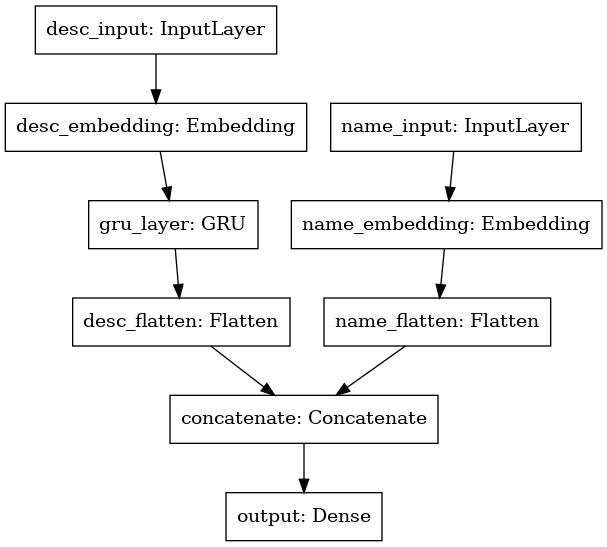

In [76]:
model=tf.keras.Model(inputs=[names_input,desc_input],outputs=output)
print(model.summary())
tf.keras.utils.plot_model(model)

In [77]:
batch_size=32
epochs=14
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=[
                 'accuracy',tf.keras.metrics.AUC(name='auc')
             ])


In [79]:
history=model.fit([
    names_train,descriptions_train
],labels_train,
validation_split=0.2,
batch_size=batch_size,
epochs=epochs,
callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

2022-01-31 08:42:31.010136: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/14
8/8 [==============================] - 7s 433ms/step - loss: 0.6806 - accuracy: 0.5667 - auc: 0.6063 - val_loss: 0.6297 - val_accuracy: 0.6721 - val_auc: 0.7718
Epoch 2/14
8/8 [==============================] - 2s 294ms/step - loss: 0.5951 - accuracy: 0.7042 - auc: 0.7517 - val_loss: 0.5927 - val_accuracy: 0.7049 - val_auc: 0.7772
Epoch 3/14
8/8 [==============================] - 2s 295ms/step - loss: 0.4928 - accuracy: 0.7458 - auc: 0.8563 - val_loss: 0.6349 - val_accuracy: 0.6393 - val_auc: 0.8023
Epoch 4/14
8/8 [==============================] - 2s 307ms/step - loss: 0.3623 - accuracy: 0.8375 - auc: 0.9157 - val_loss: 0.5367 - val_accuracy: 0.7541 - val_auc: 0.8622
Epoch 5/14
8/8 [==============================] - 2s 286ms/step - loss: 0.3441 - accuracy: 0.9667 - auc: 0.9788 - val_loss: 0.4828 - val_accuracy: 0.7213 - val_auc: 0.9243
Epoch 6/14
8/8 [==============================] - 2s 291ms/step - loss: 0.1309 - accuracy: 0.9792 - auc: 0.9973 - val_loss: 0.4716 - val_acc

In [82]:
fig=ps.line(history.history,
           y=['loss','val_loss'],
           labels={'x':'epochs','y':'accuracy'},
           title='Accuracy Over Time')
fig.show()

Results

In [84]:
result=model.evaluate([names_test,descriptions_test],labels_test)
print(result)

5/5 [==============================] - 0s 80ms/step - loss: 0.4181 - accuracy: 0.8140 - auc: 0.8889
[0.4181199371814728, 0.8139534592628479, 0.8888620734214783]
